In [1]:
import numpy as np
import py_scripts.processingIO as pio
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path
from py_scripts.forceClass import Forces

from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
from scipy.signal import find_peaks

from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_law(xData, a, b, c):
        return a + (b * xData) + (c * xData**2)

def fit_data(xData, yData):

    popt, pcov = curve_fit(power_law, xData, yData, p0=[0.5, 0.5, 0.5])

    residuals = yData - power_law(xData, *popt)

    ss_res = np.sum(residuals**2)
    ss_total = np.sum((yData-np.mean(yData))**2)

    r_squared = 1 - (ss_res/ss_total)

    return popt, r_squared

In [3]:
validation_location = r'./Validation_data.xlsx'

# load the validation case data
xl = pd.ExcelFile(validation_location)
sheet_names = xl.sheet_names
Yu_cd = pd.read_excel(xl, sheet_names[0])
Yu_cl = pd.read_excel(xl, sheet_names[1])
Dong_cd = pd.read_excel(xl, sheet_names[2])
Dong_cl = pd.read_excel(xl, sheet_names[3])


In [4]:
data_location = r'./grid_independence_study'
force_paths = pio.get_files(data_location, 'force.dat')
force_paths.sort()

total_cycles = 30
number_cycles = 30

forces_gridInd = [Forces(force_path, number_cycles, total_cycles, True, True, filterWindow = 101) for force_path in force_paths]

density = 1026.021
U = 1.0
A = 1.0

for force in forces_gridInd:
    force.toCoefficients(density, U, A)

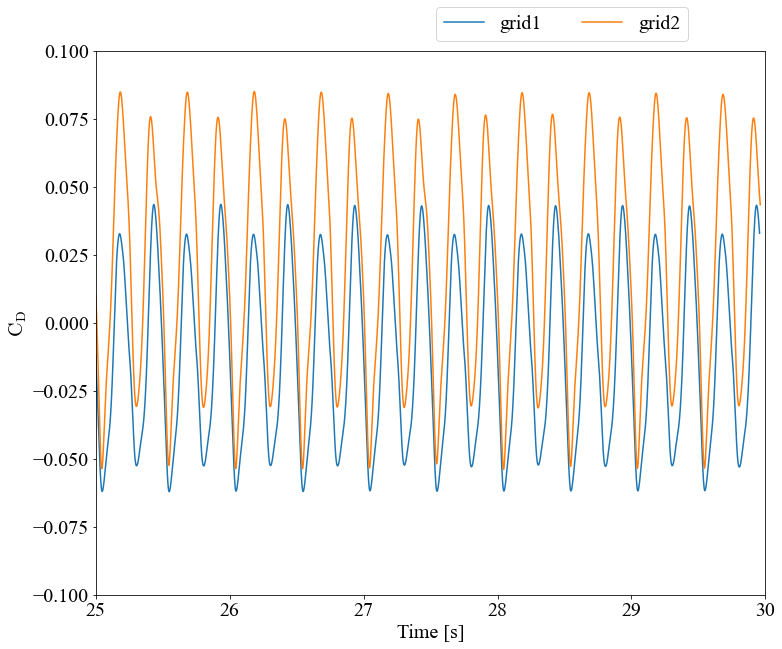

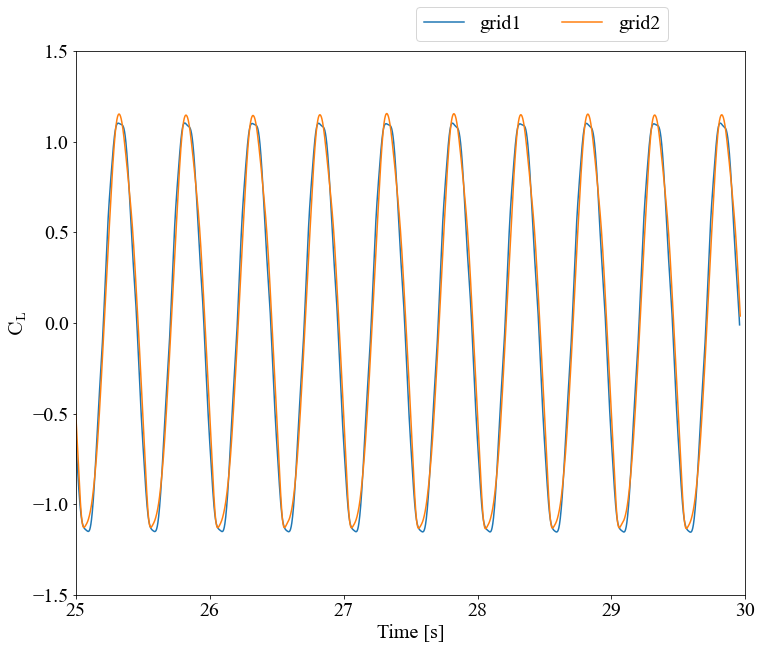

In [5]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_gridInd:
    ax1.plot(force.filteredForces['time'], force.Cd, label=force.specific_case )
    
    ax1.set_ylabel('$\mathrm{C_D}$')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylim([-0.1, 0.1])
    ax1.set_xlim([25, 30])
    ax1.legend(ncol=3, loc=4, bbox_to_anchor=(0.9, 1.0))

fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_gridInd:
    ax2.plot(force.filteredForces['time'], force.Cl, label=force.specific_case)
    
    ax2.set_ylabel('$\mathrm{C_L}$')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylim([-1.5, 1.5])
    ax2.set_xlim([25, 30])
    ax2.legend(ncol=3, loc=4, bbox_to_anchor=(0.9, 1.0))

In [41]:
data_location = r'./grid_independence_study'
force_paths = pio.get_files(data_location, 'force.dat')
force_paths.sort()

total_cycles = 30
number_cycles = 5

forces_gridInd = [Forces(force_path, number_cycles, total_cycles, True, True, filterWindow = 101) for force_path in force_paths]

density = 1026.021
U = 1.0
A = 1.0
Cd0 = 0.5 * (1 + (1.5 * (1.0/0.12)**(-1.5) + (7 * (1.0/0.12)**(-3)))) * U**2 * A

for force in forces_gridInd:
    force.toCoefficients(density, U, A)

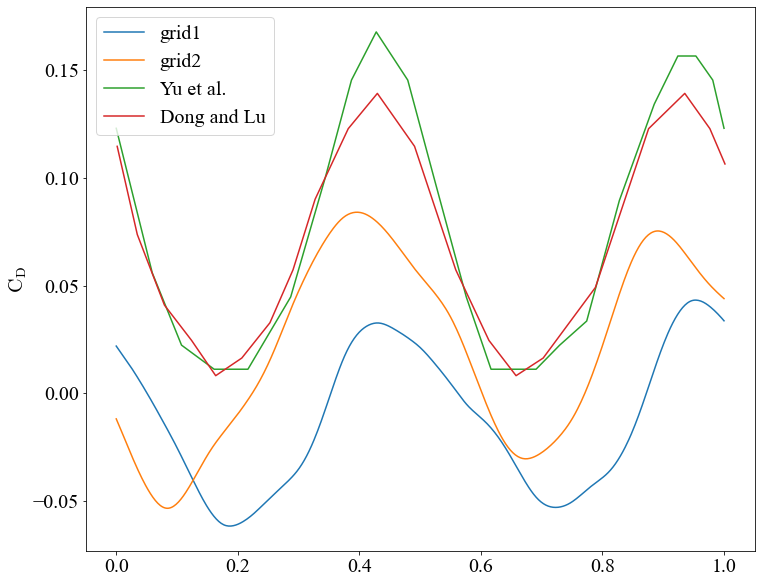

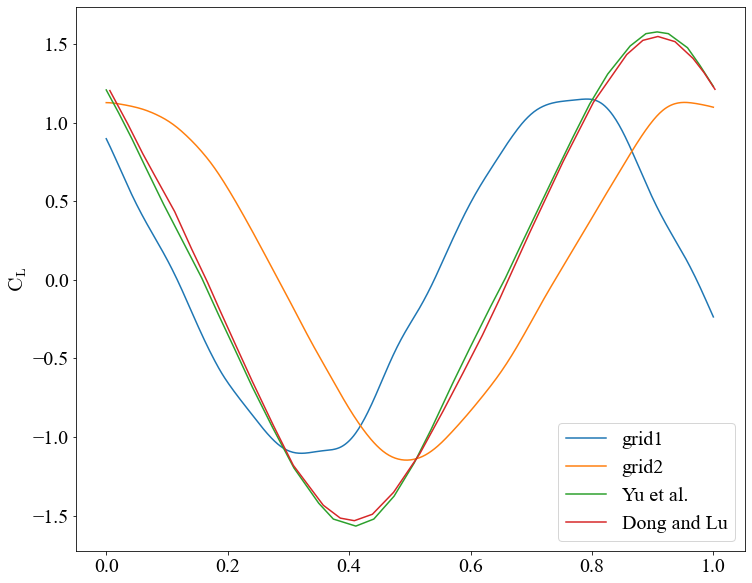

In [44]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

interval = [-500, -1]

for force in forces_gridInd:
    force_time = np.linspace(0, 1.0, len(force.Cd[interval[0]:interval[1]]))
    ax3.plot(force_time, force.Cd[interval[0]:interval[1]], label=force.specific_case )
    
    ax3.set_ylabel('$\mathrm{C_D}$')

ax3.plot(Yu_cd['time'].values, Yu_cd['Cd'].values, label='Yu et al.')
ax3.plot(Dong_cd['time'].values, -Dong_cd['Cd'].values, label='Dong and Lu')

ax3.legend()

fig4, ax4 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

interval = [600, 1200]

for force in forces_gridInd:
    force_time = np.linspace(0, 1.0, len(force.Cl[interval[0]:interval[1]]))
    ax4.plot(force_time-(force_time[-1] - 1), -force.Cl[interval[0]:interval[1]], label=force.specific_case )

    ax4.set_ylabel('$\mathrm{C_L}$')

ax4.plot(Yu_cl['time'].values, Yu_cl['Cl'].values, label='Yu et al.')
ax4.plot(Dong_cl['time'].values, Dong_cl['Cl'].values, label='Dong and Lu')

ax4.legend()

KeyError: 'CD'

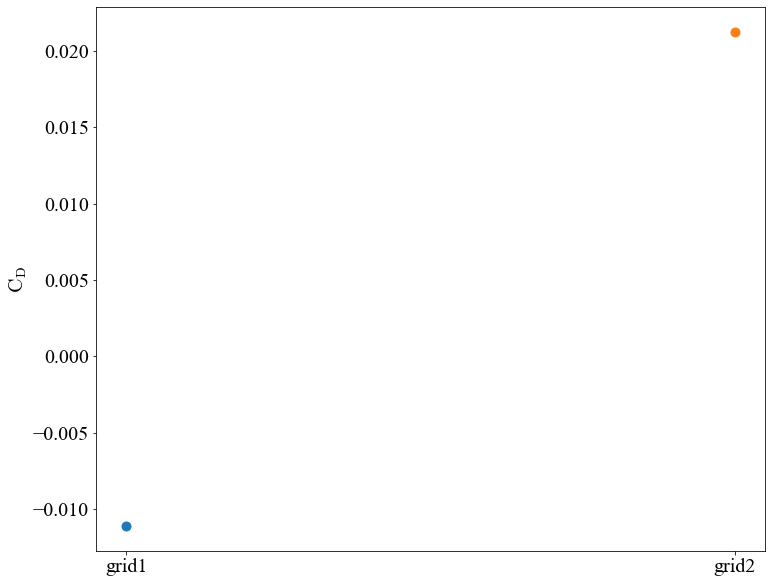

In [8]:
fig5, ax5 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_gridInd:
    ax5.plot(force.specific_case, np.mean(force.Cd), 'o')
    
    ax5.set_ylabel('$\mathrm{C_D}$')

ax5.plot('Yu et al.', np.mean(Yu_cd['Cd'].values), 'o')
ax5.plot('Dong and Lu', np.mean(Dong_cd['Cd'].values), 'o')

fig6, ax6 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_gridInd:
    ax6.plot(force.specific_case, np.mean(force.Cl), 'o')

    ax6.set_ylabel('$\mathrm{C_L}$')

ax6.plot('Yu et al.', np.mean(Yu_cl['Cl'].values), 'o')
ax6.plot('Dong and Lu', np.mean(Dong_cl['Cl'].values), 'o')

In [ ]:
data_location = r'./pimple_iteration_sensitivity'

force_paths = pio.get_files(data_location, 'force.dat')
force_paths.sort()

total_cycles = 60
number_cycles = 60

forces_timeSense = [Forces(force_path, number_cycles, total_cycles, True, True, filterWindow = 101) for force_path in force_paths]

density = 1026.021
U = 1.0
A = 1.0

for force in forces_timeSense:
    force.toCoefficients(density, U, A)

In [ ]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_timeSense:
    ax3.plot(force.filteredForces['time'], force.Cd, label=force.specific_case )
    
    ax3.set_ylabel('$\mathrm{C_D}$')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylim([-0.3, 0.3])
    #ax3.set_xlim([25, 30])
    ax3.legend(ncol=3, loc=4, bbox_to_anchor=(1.0, 0.99))

fig4, ax4 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_timeSense:
    ax4.plot(force.filteredForces['time'], force.Cl, label=force.specific_case)
    
    ax4.set_ylabel('$\mathrm{C_L}$')
    ax4.set_xlabel('Time [s]')
    ax4.set_ylim([-2.5, 2.5])
    #ax4.set_xlim([25, 30])
    ax4.legend(ncol=3, loc=4, bbox_to_anchor=(1.0, 0.99))

In [ ]:
fig5, ax5 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_timeSense:
    ax5.plot(force.filteredForces['time'], force.Cd, label=force.specific_case )
    
    ax5.set_ylabel('$\mathrm{C_D}$')
    ax5.set_xlabel('Time [s]')
    ax5.set_ylim([-0.12, 0.12])
    ax5.set_xlim([55, 60])
    ax5.legend(ncol=3, loc=4, bbox_to_anchor=(1.0, 0.99))

fig6, ax6 = plt.subplots(figsize=(12,10), facecolor='w', sharex=True)

for force in forces_timeSense:
    ax6.plot(force.filteredForces['time'], force.Cl, label=force.specific_case)
    
    ax6.set_ylabel('$\mathrm{C_L}$')
    ax6.set_xlabel('Time [s]')
    ax6.set_ylim([-1.7, 1.7])
    ax6.set_xlim([55, 60])
    ax6.legend(ncol=3, loc=4, bbox_to_anchor=(1.0, 0.99))